Original array: [1 2 3 4 5]
Squared array: [ 1  4  9 16 25]
Logarithm of array: [0.         0.69314718 1.09861229 1.38629436 1.60943791]

Timing comparison:
2.13 µs ± 155 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
693 ns ± 194 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes
None

First 5 rows:


,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


Descriptive Statistics:


,value
count,10.000000
mean,17.600000
std,7.381659
min,10.000000
25%,12.250000
50%,14.500000
75%,23.250000
max,30.000000



Grouped Statistics (by category):


,mean,median,std,count
category,,,,
A,11.500000,11.5,1.290994,4
B,15.666667,15.0,2.081666,3
C,27.666667,28.0,2.516611,3


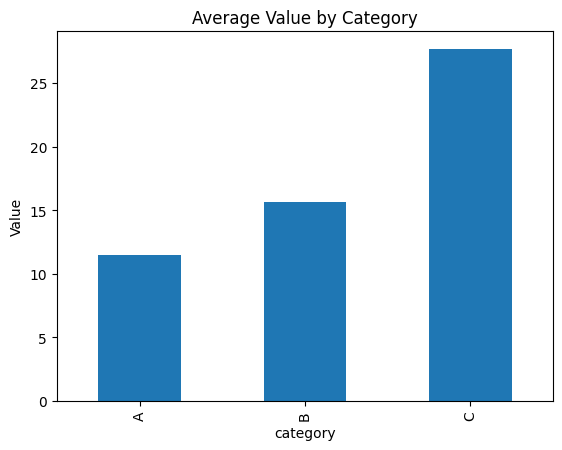

,mean,median,std,count
category,,,,
A,11.500000,11.5,1.290994,4
B,15.666667,15.0,2.081666,3
C,27.666667,28.0,2.516611,3


,mean,median,std,count
category,,,,
A,11.500000,11.5,1.290994,4
B,15.666667,15.0,2.081666,3
C,27.666667,28.0,2.516611,3


In [1]:
import numpy as np

# Create arrays and demonstrate elementwise operations
arr = np.array([1, 2, 3, 4, 5])
print("Original array:", arr)
print("Squared array:", arr ** 2)
print("Logarithm of array:", np.log(arr))

# Compare loop vs vectorized operations
def square_with_loop(array):
    result = []
    for x in array:
        result.append(x ** 2)
    return result

print("\nTiming comparison:")
%timeit square_with_loop(arr)  # Loop method
%timeit arr ** 2              # Vectorized method


# ## 2. Dataset Loading

import pandas as pd

# Load and inspect data
df = pd.read_csv('data/starter_data.csv')
print("\nData Info:")
print(df.info())

print("\nFirst 5 rows:")
display(df.head())


#3. Summary Statistics

# Basic statistics
print("Descriptive Statistics:")
display(df.describe())

# Groupby operations
print("\nGrouped Statistics (by category):")
grouped = df.groupby('category')['value'].agg(['mean', 'median', 'std', 'count'])
display(grouped)


#4. Save Outputs

import os

# Create processed directory if it doesn't exist
os.makedirs('data/processed', exist_ok=True)

# Save outputs
df.describe().to_csv('data/processed/summary.csv')
grouped.to_json('data/processed/grouped_stats.json')

# Bonus: Basic plot
import matplotlib.pyplot as plt
df.groupby('category')['value'].mean().plot(kind='bar')
plt.title('Average Value by Category')
plt.ylabel('Value')
plt.savefig('data/processed/value_by_category.png')
plt.show()


#5. Reusable Functions

def get_summary_stats(dataframe, group_col, value_col):
    stats = dataframe.groupby(group_col)[value_col].agg(['mean', 'median', 'std', 'count'])
    stats.to_csv(f'data/processed/{group_col}_summary.csv')
    return stats


category_stats = get_summary_stats(df, 'category', 'value')
display(category_stats)


# Bonus: Move Function to utils.py

# Create src directory if it doesn't exist
os.makedirs('src', exist_ok=True)

# Write function to utils.py
with open('src/utils.py', 'w') as f:
    f.write("""import pandas as pd

def get_summary_stats(dataframe, group_col, value_col):
    \"\"\"Generate and save summary statistics for a DataFrame.\"\"\"
    stats = dataframe.groupby(group_col)[value_col].agg(['mean', 'median', 'std', 'count'])
    stats.to_csv(f'data/processed/{group_col}_summary.csv')
    return stats
""")

# Import and test
from src.utils import get_summary_stats
get_summary_stats(df, 'category', 'value')